# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv("alucar.csv").head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv("alucar.csv")

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
alucar.shape

(24, 2)

In [6]:
# Quantidade de dados nulos
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [7]:
# Quantidade de dados nulos
alucar.isna().sum().sum()

0

In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
alucar["mes"] = pd.to_datetime(alucar["mes"])

In [10]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [11]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

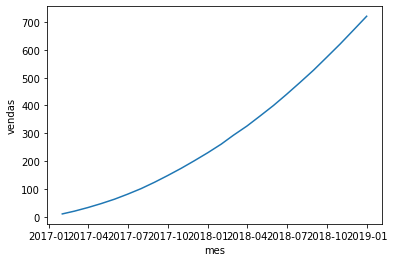

In [12]:
sns.lineplot(x="mes", y="vendas", data=alucar)

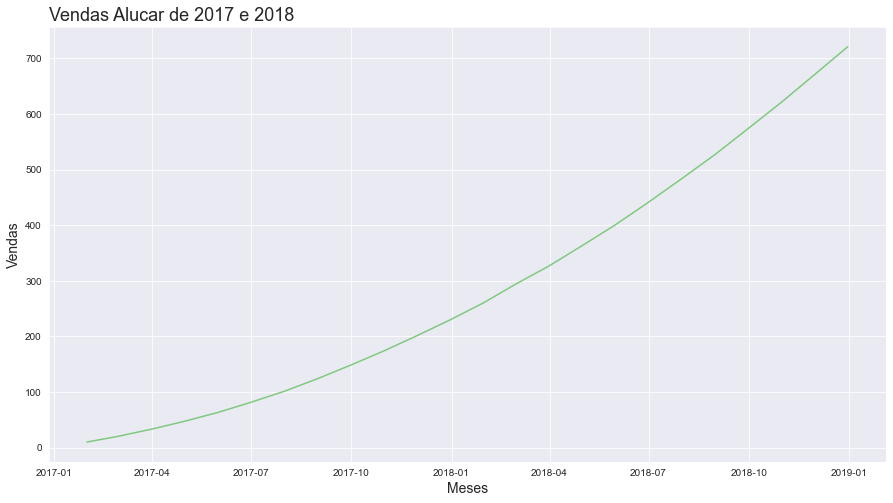

In [13]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.lineplot(x="mes", y="vendas", data=alucar)
ax.figure.set_size_inches(15, 8)
ax.set_title("Vendas Alucar de 2017 e 2018", fontsize = 18, loc = "left")
ax.set_xlabel("Meses", fontsize = 14)
ax.set_ylabel("Vendas", fontsize = 14)

plt.show()

In [14]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [15]:
alucar["aumento"] = alucar["vendas"].diff()

In [16]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


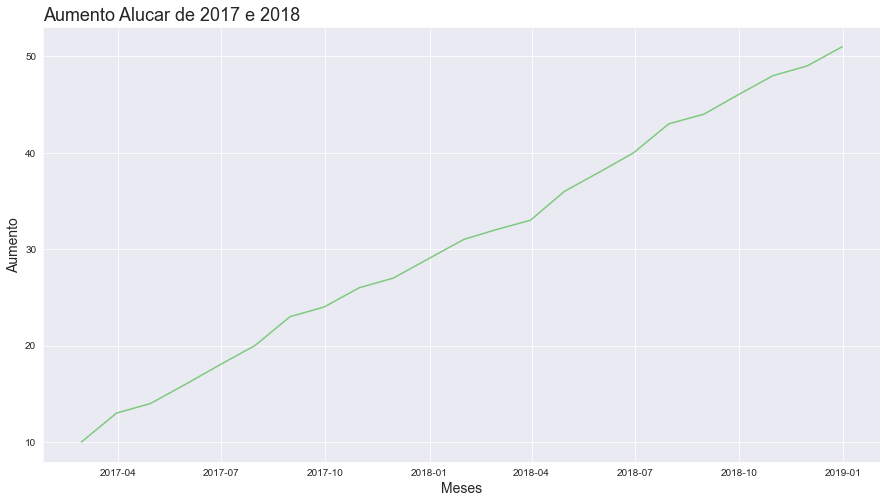

In [17]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.lineplot(x="mes", y="aumento", data=alucar)
ax.figure.set_size_inches(15, 8)
ax.set_title("Aumento Alucar de 2017 e 2018", fontsize = 18, loc = "left")
ax.set_xlabel("Meses", fontsize = 14)
ax.set_ylabel("Aumento", fontsize = 14)

plt.show()

In [18]:
def plotar(titulo, labelx, labely, x, y, data):
    
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.figure.set_size_inches(15, 8)
    ax.set_title(titulo, fontsize = 18, loc = "left")
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)

    plt.show()

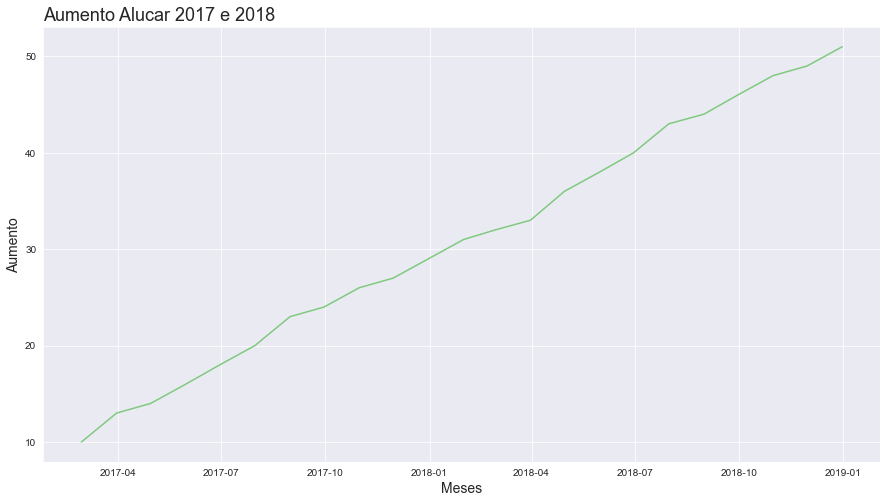

In [19]:
plotar("Aumento Alucar 2017 e 2018", "Meses", "Aumento", "mes", "aumento", alucar)

In [20]:
alucar["aceleracao"] = alucar["aumento"].diff()

In [21]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


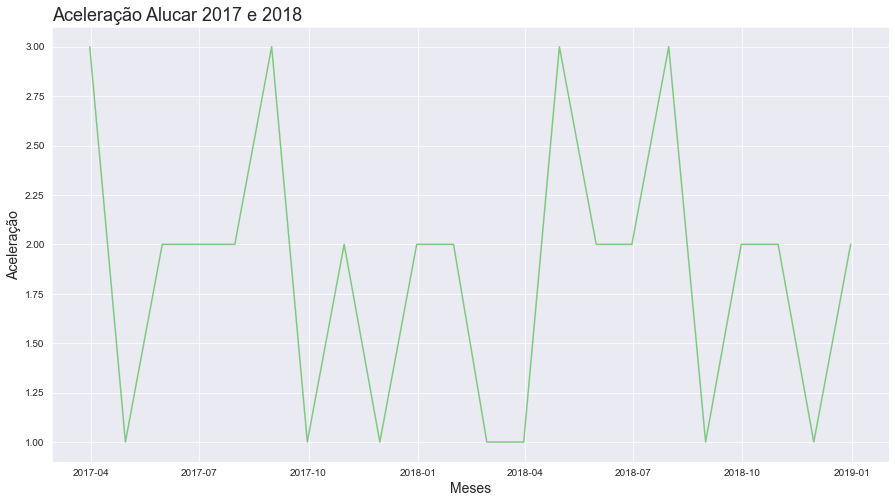

In [22]:
plotar("Aceleração Alucar 2017 e 2018", "Meses", "Aceleração", "mes", "aceleracao", alucar)

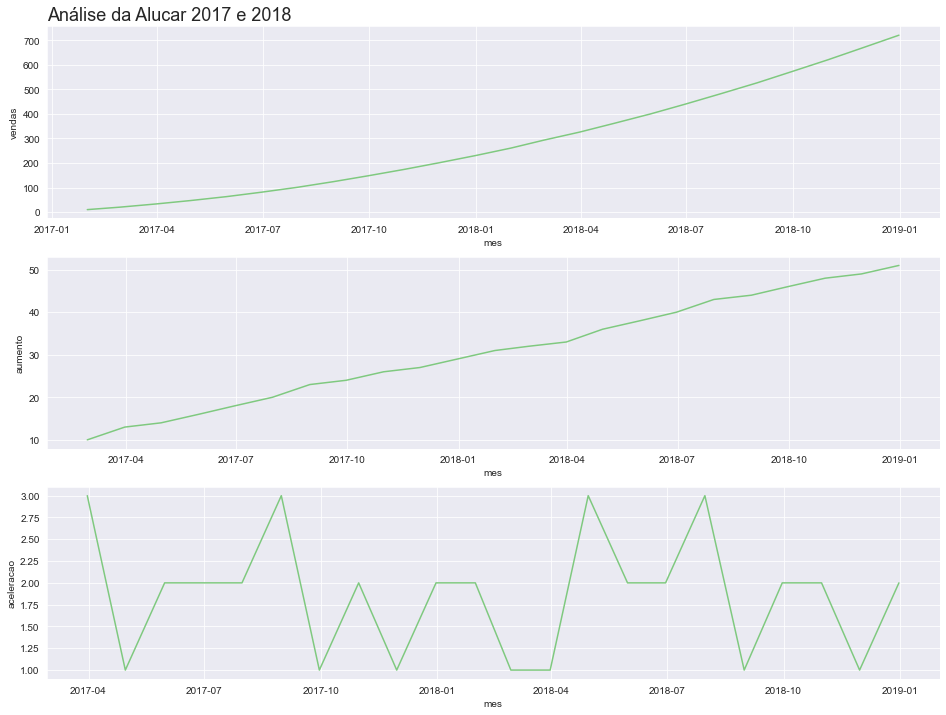

In [23]:
plt.figure(figsize = (16, 12))

# Divido em 3 partes, e quero que ax ocupe todo o espaço e esteja na primeira parte
ax = plt.subplot(3, 1, 1)
ax.set_title("Análise da Alucar 2017 e 2018", fontsize = 18, loc = "left")
sns.lineplot(x = "mes", y = "vendas", data = alucar)

plt.subplot(3, 1, 2)
sns.lineplot(x = "mes", y = "aumento", data = alucar)

plt.subplot(3, 1, 3)
sns.lineplot(x = "mes", y = "aceleracao", data = alucar)

plt.show()

In [24]:
def plot_comparacao(x, y1, y2, y3, data, titulo):
    
    plt.figure(figsize = (16, 12))

    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = "left")
    sns.lineplot(x = x, y = y1, data = data)

    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = data)

    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = data)

    plt.show()

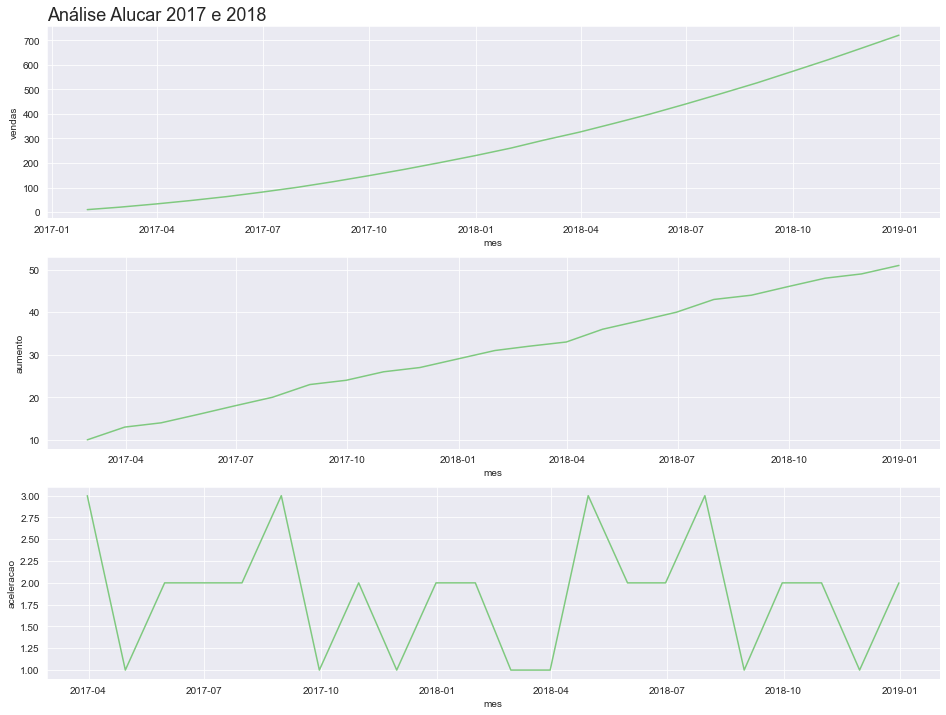

In [25]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", alucar, "Análise Alucar 2017 e 2018")

In [26]:
alucar.corr()

,vendas,aumento,aceleracao
vendas,1.000000,0.985056,-0.084736
aumento,0.985056,1.000000,-0.069843
aceleracao,-0.084736,-0.069843,1.000000


In [27]:
from pandas.plotting import autocorrelation_plot

c:\users\usuário\opencv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

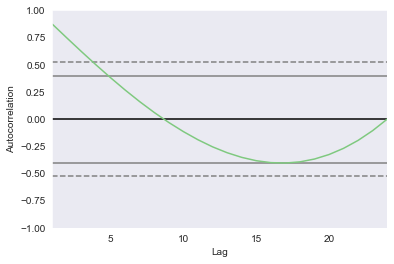

In [28]:
autocorrelation_plot(alucar["vendas"])

c:\users\usuário\opencv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

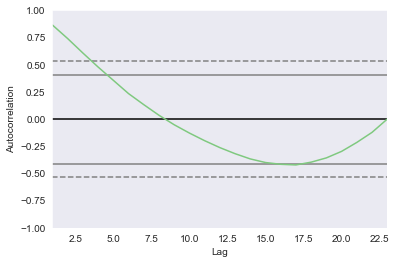

In [29]:
autocorrelation_plot(alucar["aumento"][1:])

c:\users\usuário\opencv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

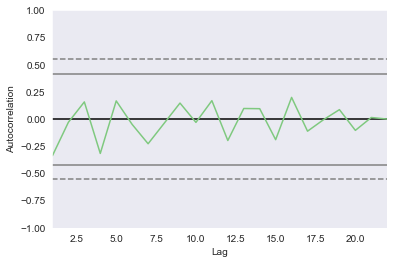

In [30]:
autocorrelation_plot(alucar["aceleracao"][2:])

# Alucar - Analisando assinantes da newsletter

In [31]:
assinantes = pd.read_csv("newsletter_alucar.csv")

In [32]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [33]:
assinantes.shape

(24, 2)

In [34]:
assinantes.isna().sum()

mes           0
assinantes    0
dtype: int64

In [35]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [36]:
assinantes["mes"] = pd.to_datetime(assinantes["mes"])

In [37]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [38]:
assinantes["aumento"] = assinantes["assinantes"].diff()

In [39]:
assinantes["aceleracao"] = assinantes["aumento"].diff()

In [40]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


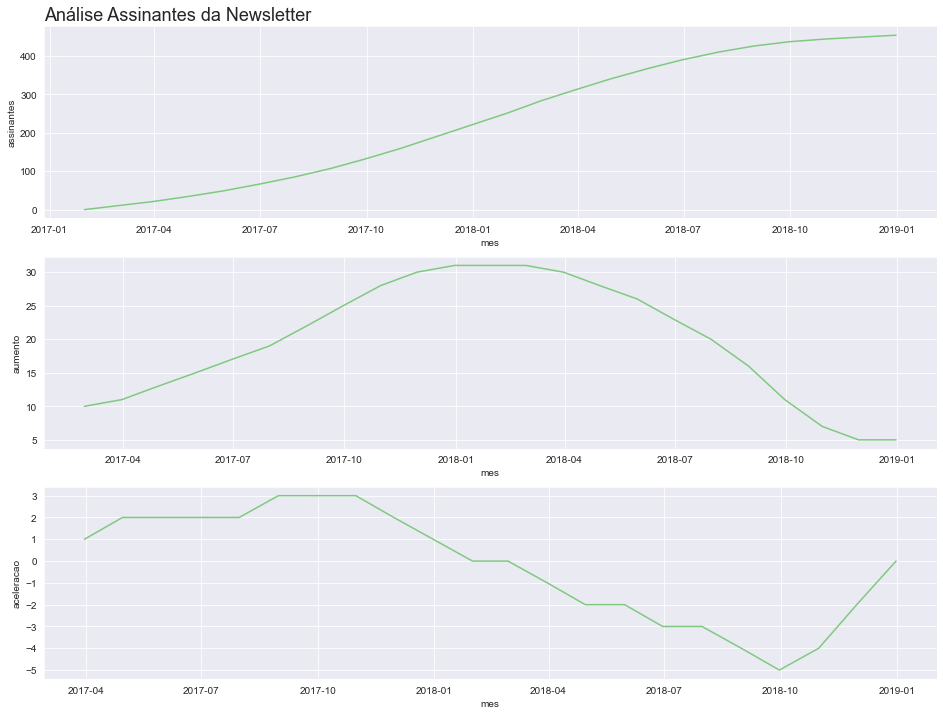

In [41]:
plot_comparacao(x = "mes", y1 = "assinantes", y2 = "aumento", y3 = "aceleracao", data = assinantes, 
                titulo = "Análise Assinantes da Newsletter")

# Chocolura - Analisando as vendas

In [42]:
chocolura = pd.read_csv("chocolura.csv")

In [43]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [44]:
chocolura.shape

(24, 2)

In [45]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [46]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [47]:
chocolura["mes"] = pd.to_datetime(chocolura["mes"])

In [48]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [49]:
chocolura["aumento"] = chocolura["vendas"].diff()

In [50]:
chocolura["aceleracao"] = chocolura["aumento"].diff()

In [51]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


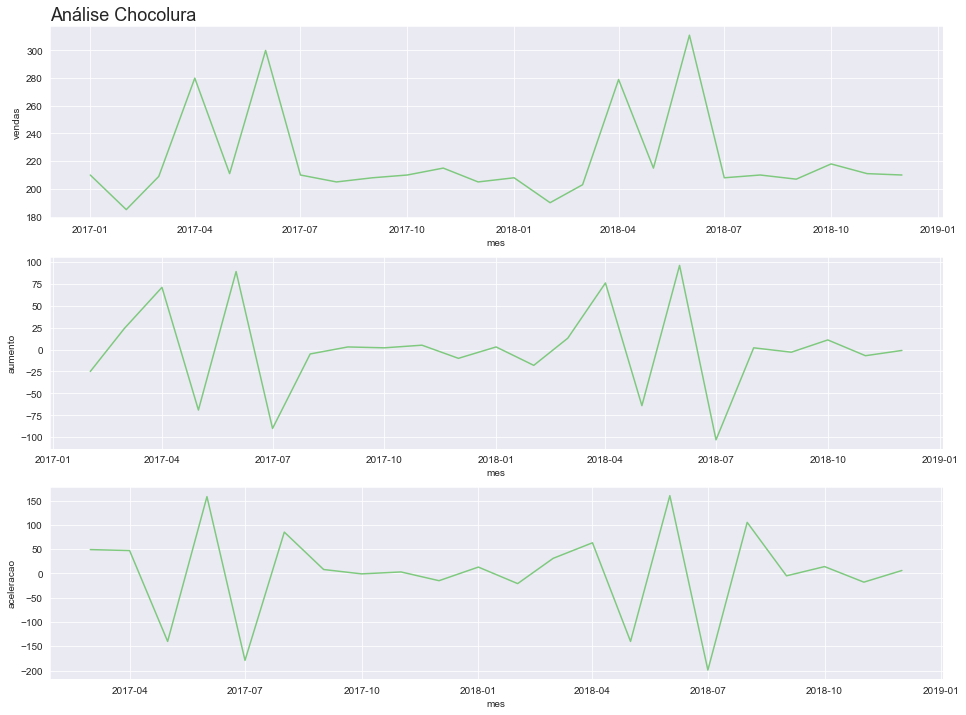

In [52]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", chocolura, "Análise Chocolura")

# Chocolura - Vendas diárias (OUT-NOV)

In [53]:
vendas_por_dia = pd.read_csv("vendas_por_dia.csv")

In [54]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [55]:
vendas_por_dia.shape

(61, 2)

In [56]:
vendas_por_dia.isna().sum()

dia       0
vendas    0
dtype: int64

In [57]:
vendas_por_dia["dia"] = pd.to_datetime(vendas_por_dia["dia"])

In [58]:
vendas_por_dia["aumento"] = vendas_por_dia["vendas"].diff()
vendas_por_dia["aceleracao"] = vendas_por_dia["aumento"].diff()

In [59]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


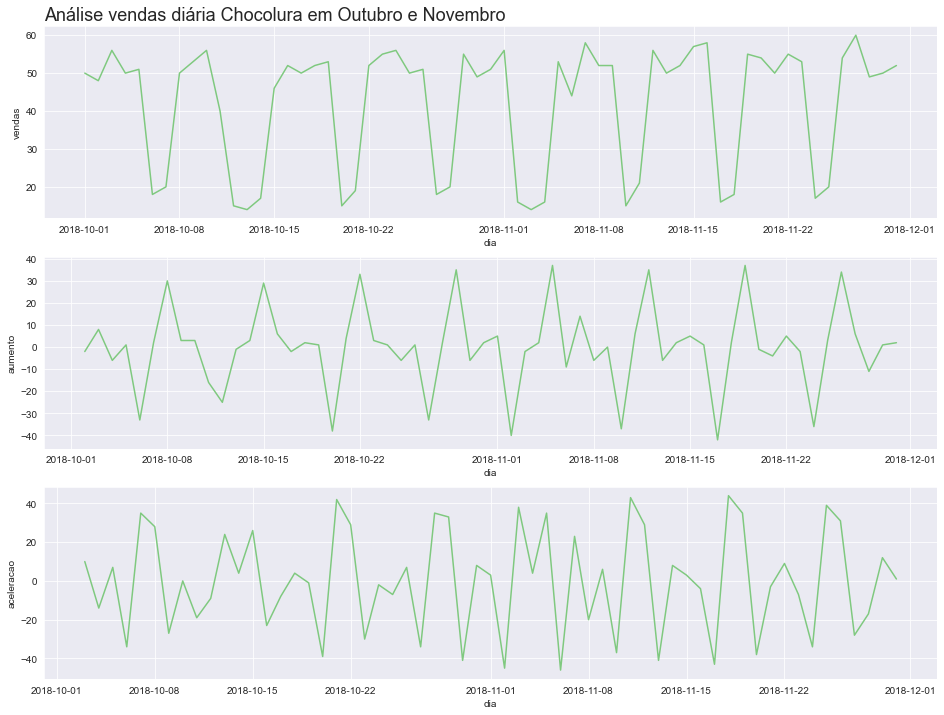

In [60]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", vendas_por_dia, 
                "Análise vendas diária Chocolura em Outubro e Novembro")

## Analisando a sazonalidade

In [61]:
vendas_por_dia["dia da semana"] = vendas_por_dia["dia"].dt.day_name()

In [62]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia da semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


## Agrupando os dias

In [63]:
vendas_agrupadas = vendas_por_dia.groupby("dia da semana").mean().round()

In [64]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia da semana,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


## Correlação das vendas diárias

c:\users\usuário\opencv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


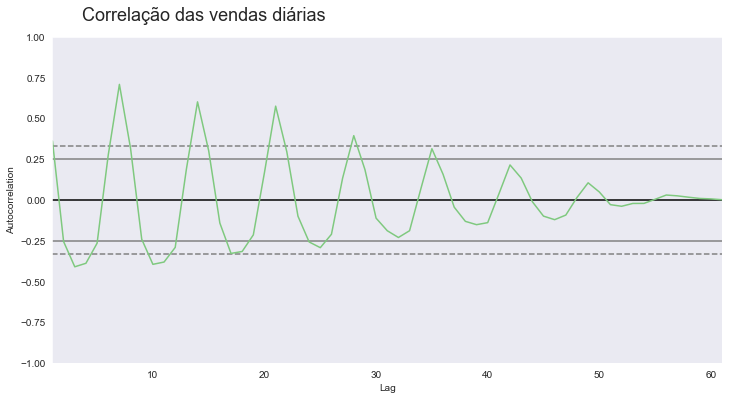

In [65]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle("Correlação das vendas diárias", fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia["vendas"])

plt.show()

c:\users\usuário\opencv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


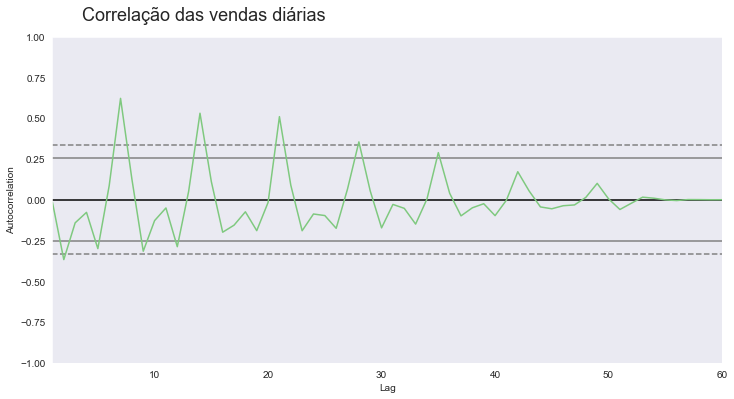

In [66]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle("Correlação das vendas diárias", fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia["aumento"][1:])

plt.show()

c:\users\usuário\opencv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


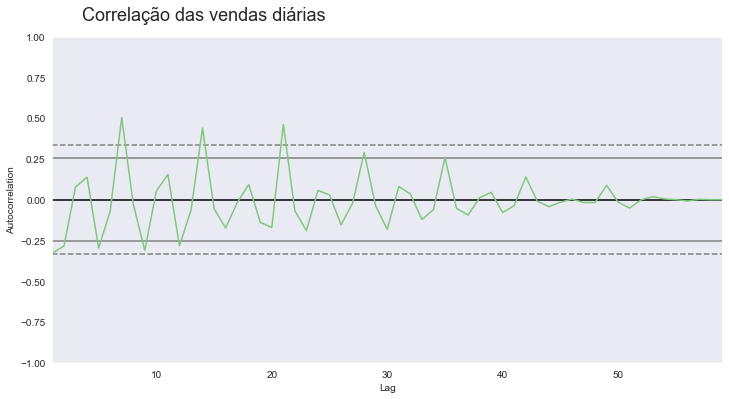

In [67]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle("Correlação das vendas diárias", fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia["aceleracao"][2:])

plt.show()

# Cafelura - Análise de vendas

In [68]:
cafelura = pd.read_csv("cafelura.csv")

In [69]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [70]:
cafelura.shape

(24, 2)

In [71]:
cafelura.isna().sum()

mes       0
vendas    0
dtype: int64

In [72]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [73]:
cafelura["mes"] = pd.to_datetime(cafelura["mes"])

In [74]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

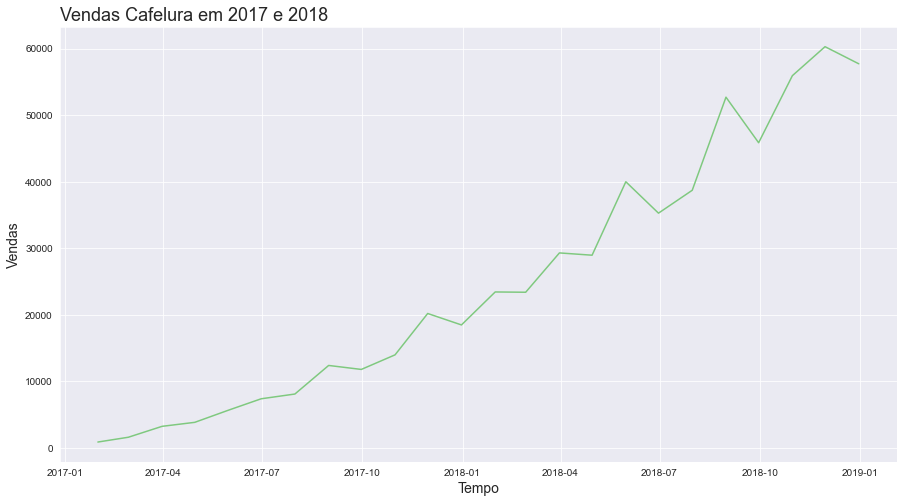

In [75]:
plotar("Vendas Cafelura em 2017 e 2018", "Tempo", "Vendas", "mes", "vendas",cafelura)

In [76]:
quantidade_fds = pd.read_csv("dias_final_de_semana.csv")

In [77]:
quantidade_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [78]:
quantidade_fds["quantidade_de_dias"].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [79]:
cafelura["vendas normalizadas"] = cafelura["vendas"]/ quantidade_fds["quantidade_de_dias"]

In [80]:
cafelura.head()

,mes,vendas,vendas normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


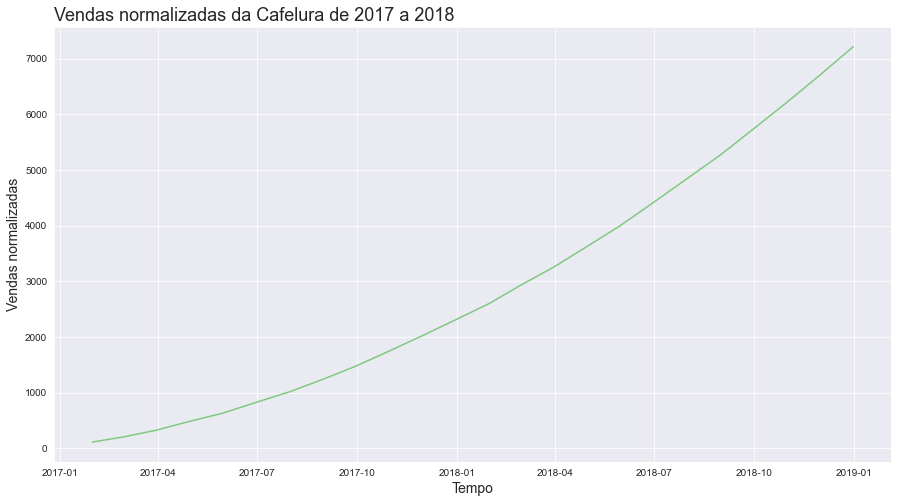

In [81]:
plotar("Vendas normalizadas da Cafelura de 2017 a 2018", "Tempo", "Vendas normalizadas", "mes",
      "vendas normalizadas", cafelura)

# Statsmodels

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

c:\users\usuário\opencv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


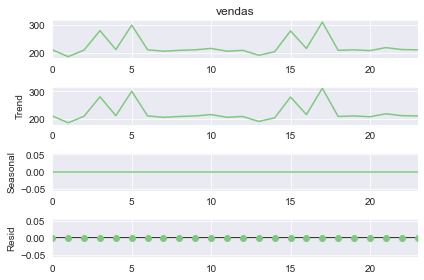

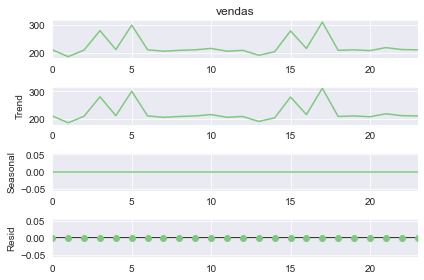

In [83]:
resultados = seasonal_decompose(chocolura["vendas"], freq=1)

resultados.plot()

c:\users\usuário\opencv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


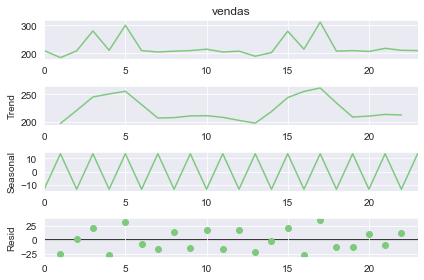

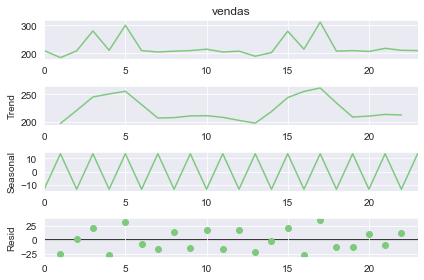

In [84]:
resultados = seasonal_decompose(chocolura["vendas"], freq=2)

resultados.plot()

In [85]:
observacao = resultados.observed
tendencia = resultados.trend
sazonalidade = resultados.seasonal
ruido = resultados.resid

In [86]:
data = ({
    "Observação": observacao,
    "Tendência": tendencia,
    "Sazonalidade": sazonalidade,
    "Ruído": ruido
})

In [87]:
resultado = pd.DataFrame(data)
resultado

,Observação,Tendência,Sazonalidade,Ruído
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636
5,300.0,255.25,13.386364,31.363636
6,210.0,231.25,-13.386364,-7.863636
7,205.0,207.00,13.386364,-15.386364
8,208.0,207.75,-13.386364,13.636364
9,210.0,210.75,13.386364,-14.136364


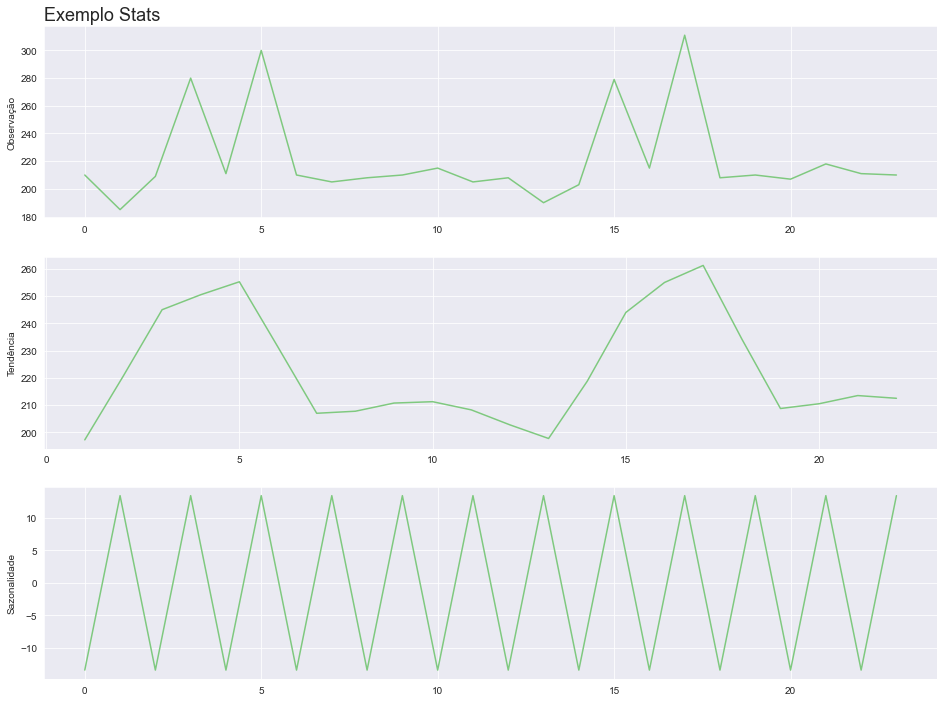

In [88]:
plot_comparacao(resultado.index, "Observação", "Tendência", "Sazonalidade", resultado, "Exemplo Stats")

# Alucel - Análise de vendas

In [89]:
alucel = pd.read_csv("alucel.csv")

In [90]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [91]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [92]:
alucel["dia"] = pd.to_datetime(alucel["dia"])

In [93]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [94]:
alucel.isna().sum()

dia       0
vendas    0
dtype: int64

In [95]:
alucel["aumento"] = alucel["vendas"].diff()

In [96]:
alucel["aceleracao"] = alucel["aumento"].diff()

In [97]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


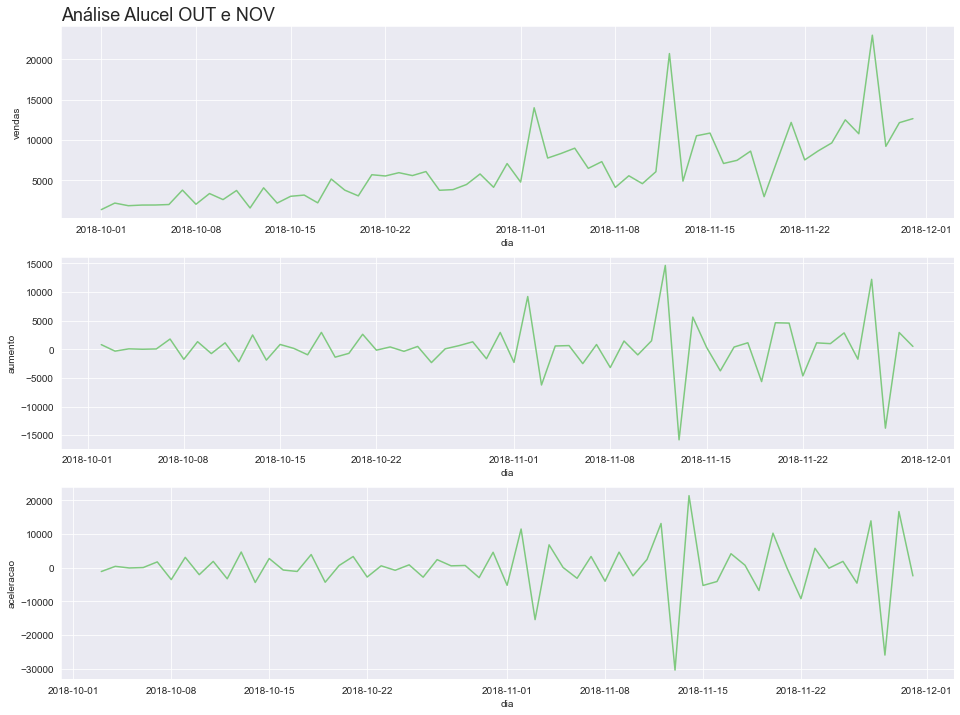

In [98]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", alucel, "Análise Alucel OUT e NOV")

## Média móvel

In [99]:
alucel["media movel"] = alucel["vendas"].rolling(7).mean()

In [100]:
alucel.head()

,dia,vendas,aumento,aceleracao,media movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


In [101]:
alucel.head(14)

,dia,vendas,aumento,aceleracao,media movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


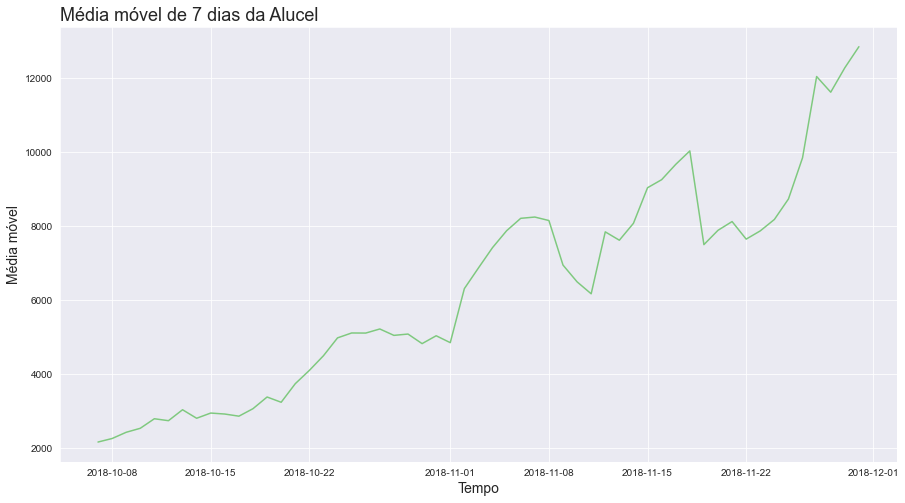

In [102]:
plotar("Média móvel de 7 dias da Alucel", "Tempo", "Média móvel", "dia", "media movel", alucel)

In [103]:
alucel["media movel 21"] = alucel["vendas"].rolling(21).mean()

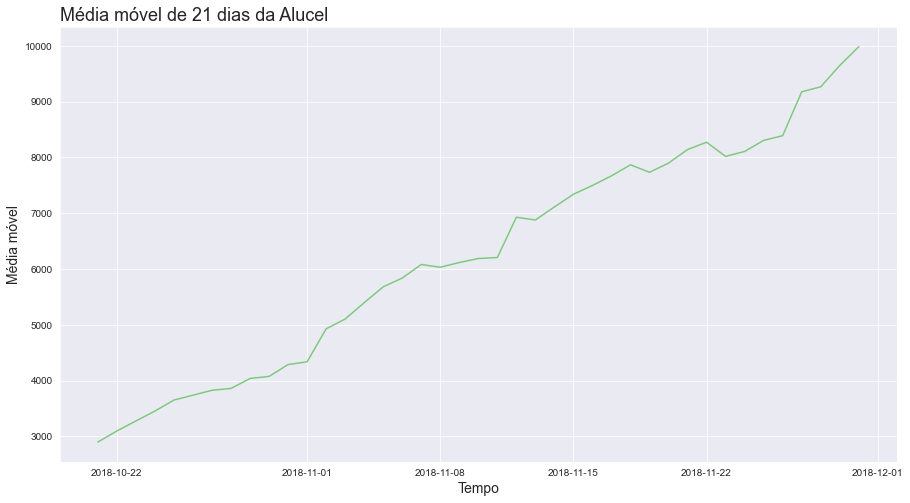

In [104]:
plotar("Média móvel de 21 dias da Alucel", "Tempo", "Média móvel", "dia", "media movel 21", alucel)

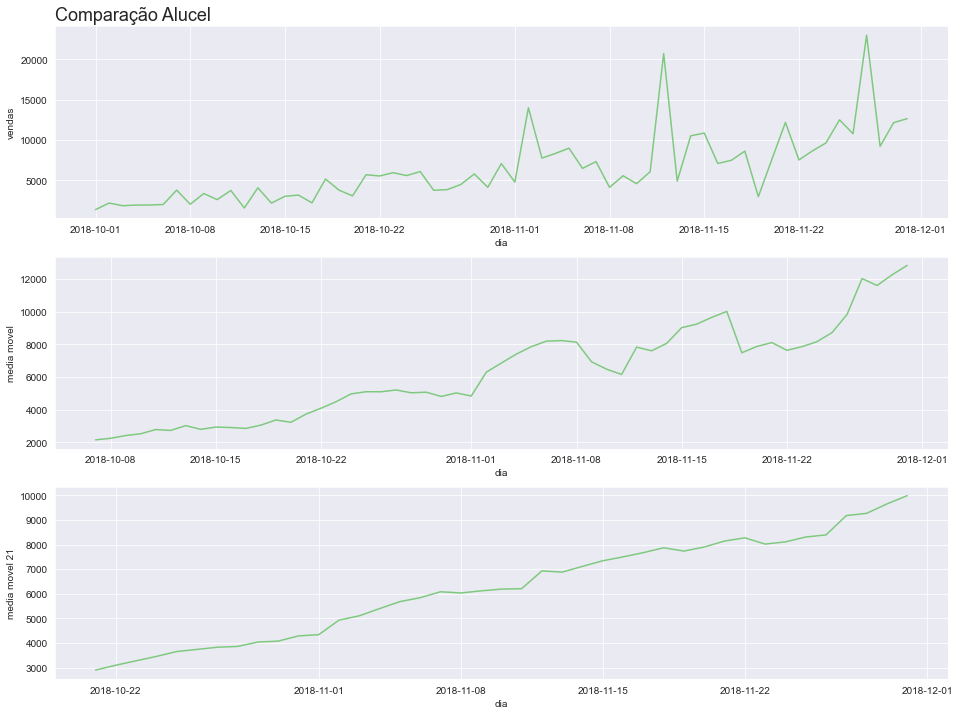

In [105]:
plot_comparacao("dia", "vendas", "media movel", "media movel 21", alucel, "Comparação Alucel")